# For the data (emails.csv) shared build following models

o Classification Model

o K-means model for clustering

o LSA model 

o LDA model and visualize the outcome using pyLDAvis

In [1]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df=pd.read_csv(r"C:\TGushpu NLP\emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.shape

(5172, 3002)

In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [8]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [9]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=45)

In [11]:
x_train.shape

(4137, 3000)

In [12]:
y_train.shape

(4137,)

# Naive Bayes Algorithm(Classifier)

In [13]:
mnb = MultinomialNB(alpha=1.9)         
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,y_test))

Accuracy Score for Naive Bayes :  0.9516908212560387


In [14]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       758
           1       0.88      0.94      0.91       277

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



# Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(x_train,y_train)
y_pred2 = rfc.predict(x_test)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred2,y_test))

Accuracy Score of Random Forest Classifier :  0.9739130434782609


In [16]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       758
           1       0.95      0.95      0.95       277

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



**Random Forest Classifier** is giving the best accuracy : **97%**

# K-means model for clustering

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [18]:
tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range=(1,2), 
                        tokenizer=tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range=(1,2),
                        tokenizer=tokenizer.tokenize)

x_train_tf = tf_idf_vect.fit_transform(x_train)
x_train_cv = count_vect.fit_transform(x_train)

print(x_train_tf.shape)
print(x_train_cv.shape)

(3000, 2762)
(3000, 2762)


- 2762 features are there we need to reduce the dimension use PCA

In [19]:
from sklearn.decomposition import PCA
import numpy as np

In [32]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_cv.todense())
print(sum(np.cumsum(pca.explained_variance_ratio_)<0.9))

C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


2484


In [33]:
len(np.cumsum(pca.explained_variance_ratio_))

2762

2762 is our dataset

In [34]:
pca = PCA(n_components=590)
x_train_pca = pca.fit_transform(x_train_tf.todense())

C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [35]:
x_train_pca.shape

(3000, 590)

stores this 590 in x_train_pca

In [36]:
tf_idf_vect.get_feature_names_out()

array(['abdv', 'ability', 'able', ..., 'zivley', 'zone', 'zonedubai'],
      dtype=object)

After reducing the dimension this feature names is not important

In [37]:
X = x_train_pca

In [38]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    pred_labels = kmeans.labels_
    Sum_of_squared_distances.append(kmeans.inertia_) 
    from sklearn import metrics
    ss = metrics.silhouette_score(X, pred_labels, metric='euclidean')
    silhouette_scores.append(ss)

2
3
4
5
6
7
8
9
10
11
12
13
14


- Inertia wil say how closely the clusters are
- Silhouette score will say how closely along how they are separated

### Use any of these to identify the cluster belongs -- provide more no. of clusters
- Elbow
- Silhouette
- Word cloud

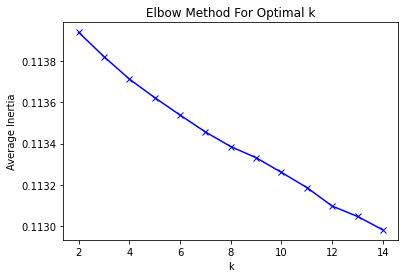

In [39]:
avg_inertia = [i/df.shape[0] for i in Sum_of_squared_distances]

import matplotlib.pyplot as plt

plt.plot(K, avg_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

- Here our situation is not ideal as we cannot see very clear elbow
- We cannot conclude any optimal number of k.

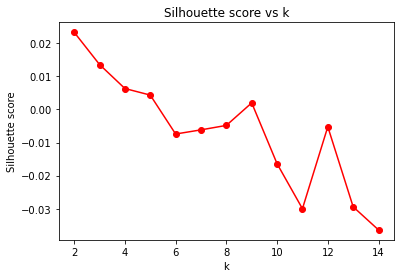

In [40]:
plt.plot(K,silhouette_scores,'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=10,init='k-means++').fit(X)
pred_labels = kmeans.labels_

In [42]:
from sklearn import metrics
ss= metrics.silhouette_score(X,pred_labels,metric='euclidean')
print("Silhouette score: ",ss)

Silhouette score:  -0.015882637527503372


- Here silhouette score is -0.01 that is clusters are not getting very close.

# Latent Semantic Analysis(LSA) Model

In [43]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')+['said','u','v','s','t']

### TF-IDF Feature Generation

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

X_train_tf = tf_idf_vect.fit_transform(x_train)
X_train_cv = count_vect.fit_transform(x_train)

X_train_tf.shape
X_train_cv.shape

(3000, 2863)

In [45]:
from sklearn.decomposition import TruncatedSVD
number_of_topics = 2
svd_model = TruncatedSVD(n_components=number_of_topics, n_iter=100, random_state=23)
svd_model.fit(X_train_tf)

TruncatedSVD(n_iter=100, random_state=23)

In [46]:
X_transformed = svd_model.transform(X_train_tf)
U = X_transformed / svd_model.singular_values_
Sigma_matrix = np.diag(svd_model.singular_values_)
VT = svd_model.components_

In [47]:
terms = tf_idf_vect.get_feature_names()

for i, comp in enumerate(VT):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("\nTopic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])


Topic 0: 
country
research
result
receive
offshore
type
equipment
music
cynthia
difficult

Topic 1: 
flight
dollars
war
recommended
fontfont
eat
wells
duke
ready
jan


C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- Topic 0 and Topic 1 belongs to **email no.**

- This wont be so perfect we have another technique

In [48]:
VT[0]

array([ 0.00076414,  0.02131837, -0.00312889, ..., -0.00242353,
       -0.03493272,  0.01350239])

In [49]:
tf_idf_vect.get_feature_names()

['abdv',
 'ability',
 'able',
 'ac',
 'accept',
 'acceptance',
 'accepted',
 'access',
 'according',
 'account',
 'accountant',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'achieve',
 'acquire',
 'acquisition',
 'across',
 'act',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'acton',
 'acts',
 'actual',
 'actually',
 'actuals',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressed',
 'addresses',
 'adjust',
 'adjusted',
 'adjustment',
 'adjustments',
 'administration',
 'adobe',
 'adonis',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'advertisement',
 'advice',
 'advise',
 'advised',
 'advises',
 'advisor',
 'aeor',
 'aep',
 'aepin',
 'affect',
 'affected',
 'affiliate',
 'affordable',
 'africa',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agreements',
 'agua',
 'ahead',
 'ail',
 'aim',
 'aimee',
 'air',
 'airmail',
 'al',
 'albrecht'

In [50]:
sorted(list(zip(tf_idf_vect.get_feature_names()[:10],VT[0][0:10])), key=lambda x:x[1], reverse=True)

[('ability', 0.021318365079908273),
 ('account', 0.015999494837328314),
 ('acceptance', 0.00906272293887398),
 ('accepted', 0.0037399419541087726),
 ('abdv', 0.0007641387802837383),
 ('able', -0.0031288908629430725),
 ('ac', -0.004383454740566796),
 ('accept', -0.007042511988109834),
 ('according', -0.01715223640644433),
 ('access', -0.030192693235673723)]

In [51]:
Sigma_matrix

array([[1., 0.],
       [0., 1.]])

In [52]:
svd_model.singular_values_

array([1., 1.])

In [53]:
VT.shape

(2, 2863)

- We extracted the hidden layers of the corpus and found the similar meaning words.

- Diagonal values are 5.34333653 and 0.99666377.

### Latent Dirichlet Allocation (LDA)

In [54]:
import gensim
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string 
from gensim.models.coherencemodel import CoherenceModel

In [55]:
corpus = df.text

In [56]:
stop = set(stopwords.words('english'))
stop.update(set(['s','said','will','year','new','u','v']))

In [57]:
punc = set(string.punctuation)

In [58]:
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    normalized = [lemmatizer.lemmatize(df) for df in df]
    return normalized

In [59]:
cleaned_corpus = [preprocess(text) for text in corpus]

In [60]:
corpus[0]

0

In [61]:
cleaned_corpus[0]

['Email No.',
 'the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'a',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'ha',
 'wa',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xl',
 'farmer',
 'attached',
 'u',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'question',
 'www',
 'deal',
 'volume',
 'pm',
 'ena',
 'now',
 'their',
 'file

In [62]:
from gensim import corpora
d = corpora.Dictionary(cleaned_corpus)
d.token2id

{'Email No.': 0,
 'Prediction': 1,
 'a': 2,
 'abdv': 3,
 'ability': 4,
 'able': 5,
 'about': 6,
 'above': 7,
 'ac': 8,
 'accept': 9,
 'acceptance': 10,
 'accepted': 11,
 'access': 12,
 'according': 13,
 'account': 14,
 'accountant': 15,
 'accounting': 16,
 'accuracy': 17,
 'accurate': 18,
 'achieve': 19,
 'acquire': 20,
 'acquisition': 21,
 'across': 22,
 'act': 23,
 'action': 24,
 'active': 25,
 'activity': 26,
 'acton': 27,
 'actual': 28,
 'actually': 29,
 'actuals': 30,
 'ad': 31,
 'add': 32,
 'added': 33,
 'adding': 34,
 'addition': 35,
 'additional': 36,
 'additionally': 37,
 'address': 38,
 'addressed': 39,
 'adjust': 40,
 'adjusted': 41,
 'adjustment': 42,
 'administration': 43,
 'adobe': 44,
 'adonis': 45,
 'adult': 46,
 'advance': 47,
 'advanced': 48,
 'advantage': 49,
 'advertisement': 50,
 'advice': 51,
 'advise': 52,
 'advised': 53,
 'advises': 54,
 'advisor': 55,
 'aeor': 56,
 'aep': 57,
 'aepin': 58,
 'affect': 59,
 'affected': 60,
 'affiliate': 61,
 'affordable': 62,
 'a

In [63]:
d.doc2bow(['ability','ability'])

[(4, 2)]

In [64]:
print(d)

Dictionary(2729 unique tokens: ['Email No.', 'Prediction', 'a', 'abdv', 'ability']...)


In [65]:
doc_term_matrix = [d.doc2bow(i) for i in cleaned_corpus]

In [66]:
Lda = gensim.models.ldamodel.LdaModel

In [67]:
lda_model = Lda(doc_term_matrix,num_topics=2,id2word=d,passes=2,random_state=0)

## Higher the coherence score better the topic model
- Computing the Coherence Score

In [68]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_corpus, dictionary=d, coherence='c_v')

In [69]:
coherence_lda = coherence_model_lda.get_coherence()

In [70]:
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5993474623957178


- **59%** of the words are closer in this topic model.

In [71]:
lda_model.print_topics()

[(0,
  '0.001*"hour" + 0.001*"entry" + 0.001*"payment" + 0.001*"tax" + 0.001*"m" + 0.001*"provider" + 0.001*"stock" + 0.001*"term" + 0.001*"mail" + 0.001*"head"'),
 (1,
  '0.001*"process" + 0.001*"give" + 0.001*"lot" + 0.001*"place" + 0.001*"investor" + 0.001*"cd" + 0.001*"well" + 0.001*"activity" + 0.001*"ce" + 0.001*"way"')]

- **hour and entry, payment and tax** are very close.
- **ce** and **cd** are domain-specific abbreviations.

In [72]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p=pyLDAvis.gensim.prepare(lda_model,doc_term_matrix,d)

In [73]:
p

PreparedData(topic_coordinates=             x    y  topics  cluster      Freq
topic                                         
1      0.00319  0.0       1        1  50.02787
0     -0.00319  0.0       2        1  49.97213, topic_info=         Term          Freq         Total Category  logprob  loglift
1160     hour  10336.000000  10336.000000  Default  30.0000  30.0000
2047  remains   5177.000000   5177.000000  Default  29.0000  29.0000
810     entry  10336.000000  10336.000000  Default  28.0000  28.0000
1800  payment  10337.000000  10337.000000  Default  27.0000  27.0000
2391      tax  10337.000000  10337.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1523     mean   5905.374000  10340.706334   Topic2  -7.1807   0.1335
2527        u   5885.116848  10340.844222   Topic2  -7.1842   0.1300
1371     last   5881.555791  10340.865827   Topic2  -7.1848   0.1294
1530   medium   5841.374785  10341.063013   Topic2  -7.1916   0.1225
1532  meeting   5838.836206  10341.104275   Topic2  -7.1921   0.1221

[146 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
14        1  0.425895     account
14        2  0.574146     account
26        1  0.594597    activity
26        2  0.405416    activity
42        1  0.573500  adjustment
...     ...       ...         ...
2642      2  0.403479        well
2692      1  0.627386       world
2692      2  0.372529       world
2697      1  0.638555       write
2697      2  0.361493       write

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# INSIGHT:

- Topics are not overlapped.
- Here we have two topics related to email.